In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pwd

'/Users/canerozer/Desktop/BU/SPRING2024/CS585/final_project'

In [3]:
cd dataset

/Users/canerozer/Desktop/BU/SPRING2024/CS585/final_project/dataset


In [4]:
cd z3

/Users/canerozer/Desktop/BU/SPRING2024/CS585/final_project/dataset/z3


In [5]:
ls

z3_box_coords.txt       z3_modified_coords.txt  z3_real.mp4
z3_boxes.mp4            z3_pred.mp4
z3_cropped.mp4          z3_pred1.mp4


In [6]:
f = open("z3_modified_coords.txt", "r")

In [7]:
all_positions=f.readlines()
all_positions

['1,1,465,346\n',
 '1,2,522,483\n',
 '2,1,461,347\n',
 '2,2,522,484\n',
 '3,1,458,347\n',
 '3,2,522,485\n',
 '4,1,455,348\n',
 '4,2,521,486\n',
 '5,1,452,349\n',
 '5,2,520,487\n',
 '6,1,449,349\n',
 '6,2,519,488\n',
 '7,1,447,350\n',
 '7,2,519,489\n',
 '8,1,444,350\n',
 '8,2,519,490\n',
 '9,1,442,351\n',
 '9,2,519,490\n',
 '10,1,440,352\n',
 '10,2,518,490\n',
 '11,1,437,353\n',
 '11,2,518,491\n',
 '12,1,435,353\n',
 '12,2,517,492\n',
 '13,1,432,354\n',
 '13,2,517,493\n',
 '14,1,430,354\n',
 '14,2,517,493\n',
 '15,1,427,355\n',
 '15,2,517,494\n',
 '16,1,425,356\n',
 '16,2,517,496\n',
 '17,1,423,356\n',
 '17,2,519,497\n',
 '18,1,421,357\n',
 '18,2,519,499\n',
 '19,1,419,357\n',
 '19,2,519,500\n',
 '20,1,417,358\n',
 '20,2,519,501\n',
 '21,1,416,358\n',
 '21,2,519,503\n',
 '22,1,413,358\n',
 '22,2,518,503\n',
 '23,1,411,359\n',
 '23,2,519,505\n',
 '24,1,409,360\n',
 '24,2,518,505\n',
 '25,1,407,360\n',
 '25,2,517,506\n',
 '26,1,406,360\n',
 '26,2,517,508\n',
 '27,1,404,361\n',
 '27,2,517,

meaning of the positions:

1: frame: The video frame which the annotation is associated with

2: id: Identity of the fish

3: x position 

4: y position

In [8]:
len(all_positions)

3600

In [9]:
len(all_positions)//2 # DIVIDING BY TWO BECAUSE THERE ARE TWO FISH

1800

1800 must be 910. This is because z4 has only 910 frames. 910*2=1820.

In [10]:
all_positions=all_positions[:1820]

In [11]:
len(all_positions)

1820

# For Z3

In [12]:
all_positions[-1]

'910,2,517,622\n'

In [13]:
positions_frame=dict()

for x in range(1,(len(all_positions)//2) +1):
    positions_frame[x]=[]

In [14]:
for position in all_positions:
    
    frame = int(re.match(r'^([^,]+)', position).group(1))
    positions_frame[frame] +=[position]
    


In [15]:
positions_frame

{1: ['1,1,465,346\n', '1,2,522,483\n'],
 2: ['2,1,461,347\n', '2,2,522,484\n'],
 3: ['3,1,458,347\n', '3,2,522,485\n'],
 4: ['4,1,455,348\n', '4,2,521,486\n'],
 5: ['5,1,452,349\n', '5,2,520,487\n'],
 6: ['6,1,449,349\n', '6,2,519,488\n'],
 7: ['7,1,447,350\n', '7,2,519,489\n'],
 8: ['8,1,444,350\n', '8,2,519,490\n'],
 9: ['9,1,442,351\n', '9,2,519,490\n'],
 10: ['10,1,440,352\n', '10,2,518,490\n'],
 11: ['11,1,437,353\n', '11,2,518,491\n'],
 12: ['12,1,435,353\n', '12,2,517,492\n'],
 13: ['13,1,432,354\n', '13,2,517,493\n'],
 14: ['14,1,430,354\n', '14,2,517,493\n'],
 15: ['15,1,427,355\n', '15,2,517,494\n'],
 16: ['16,1,425,356\n', '16,2,517,496\n'],
 17: ['17,1,423,356\n', '17,2,519,497\n'],
 18: ['18,1,421,357\n', '18,2,519,499\n'],
 19: ['19,1,419,357\n', '19,2,519,500\n'],
 20: ['20,1,417,358\n', '20,2,519,501\n'],
 21: ['21,1,416,358\n', '21,2,519,503\n'],
 22: ['22,1,413,358\n', '22,2,518,503\n'],
 23: ['23,1,411,359\n', '23,2,519,505\n'],
 24: ['24,1,409,360\n', '24,2,518,505\

In [16]:
positions_by_frame=list(positions_frame.values())

In [17]:
positions_by_frame[:2]

[['1,1,465,346\n', '1,2,522,483\n'], ['2,1,461,347\n', '2,2,522,484\n']]

In [18]:
positions_id=dict()

for x in range(1,3):
    positions_id[x]=[]

    

In [19]:
for positions in positions_by_frame:
    for position in positions:
        
        match = int(re.match(r'^[^,]+,([^,]+)', position).group(1))
        match_x = int(re.match(r'^[^,]+,[^,]+,([^,]+)', position).group(1))
        match_y = int(re.match(r'^[^,]+,[^,]+,[^,]+,([^,\n]+)', position).group(1))
        
        positions_id[match] +=[(match_x,match_y)]
        
        

In [20]:
positions_id[1][0]

(465, 346)

In [21]:
positions_id[1]

[(465, 346),
 (461, 347),
 (458, 347),
 (455, 348),
 (452, 349),
 (449, 349),
 (447, 350),
 (444, 350),
 (442, 351),
 (440, 352),
 (437, 353),
 (435, 353),
 (432, 354),
 (430, 354),
 (427, 355),
 (425, 356),
 (423, 356),
 (421, 357),
 (419, 357),
 (417, 358),
 (416, 358),
 (413, 358),
 (411, 359),
 (409, 360),
 (407, 360),
 (406, 360),
 (404, 361),
 (402, 361),
 (401, 361),
 (399, 363),
 (397, 363),
 (396, 363),
 (394, 364),
 (393, 364),
 (392, 365),
 (390, 365),
 (389, 366),
 (391, 371),
 (394, 376),
 (397, 382),
 (400, 384),
 (400, 388),
 (401, 391),
 (402, 395),
 (403, 398),
 (403, 401),
 (404, 404),
 (404, 406),
 (405, 409),
 (404, 412),
 (406, 415),
 (406, 418),
 (407, 419),
 (407, 422),
 (407, 424),
 (408, 426),
 (408, 428),
 (408, 431),
 (408, 432),
 (409, 434),
 (409, 436),
 (409, 438),
 (410, 440),
 (411, 442),
 (411, 444),
 (412, 445),
 (412, 447),
 (412, 448),
 (412, 450),
 (413, 452),
 (413, 454),
 (414, 455),
 (414, 457),
 (414, 458),
 (414, 459),
 (414, 461),
 (415, 462),

In [22]:
positions_id[2]

[(522, 483),
 (522, 484),
 (522, 485),
 (521, 486),
 (520, 487),
 (519, 488),
 (519, 489),
 (519, 490),
 (519, 490),
 (518, 490),
 (518, 491),
 (517, 492),
 (517, 493),
 (517, 493),
 (517, 494),
 (517, 496),
 (519, 497),
 (519, 499),
 (519, 500),
 (519, 501),
 (519, 503),
 (518, 503),
 (519, 505),
 (518, 505),
 (517, 506),
 (517, 508),
 (517, 509),
 (516, 510),
 (516, 510),
 (516, 512),
 (517, 514),
 (516, 514),
 (517, 516),
 (517, 516),
 (516, 517),
 (516, 518),
 (516, 519),
 (516, 520),
 (516, 520),
 (515, 521),
 (515, 523),
 (514, 523),
 (514, 523),
 (511, 524),
 (509, 523),
 (507, 523),
 (505, 523),
 (504, 523),
 (502, 523),
 (501, 525),
 (499, 526),
 (498, 526),
 (497, 527),
 (495, 528),
 (495, 529),
 (494, 530),
 (493, 531),
 (492, 532),
 (491, 533),
 (489, 533),
 (488, 533),
 (488, 534),
 (486, 536),
 (485, 536),
 (485, 537),
 (484, 538),
 (483, 538),
 (483, 539),
 (482, 540),
 (481, 540),
 (480, 541),
 (479, 542),
 (478, 542),
 (477, 542),
 (476, 543),
 (475, 543),
 (474, 544),

In [23]:
positions_id.keys()

dict_keys([1, 2])

In [24]:
delta_position_1=[]



for idd in range(1,3):

    positions=positions_id[idd]
    for i in range(len(positions)-1):

        point1=np.array(positions[i])
        point2=np.array(positions[i+1])

        dist = np.linalg.norm(point1 - point2)
            
        delta_position_1 +=[int(dist)]
            
            

In [25]:
delta_position_1[:10]

[4, 3, 3, 3, 3, 2, 3, 2, 2, 3]

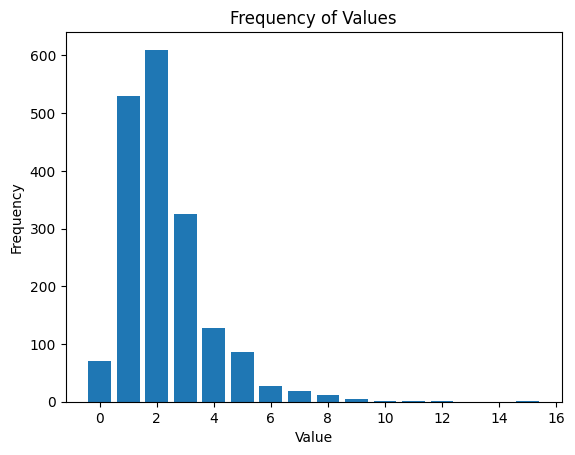

In [26]:
# Count the frequency of each value
value_counts = {}
for value in delta_position_1:
    if value in value_counts:
        value_counts[value] += 1
    else:
        value_counts[value] = 1

# Extract values and frequencies for plotting
x = list(value_counts.keys())
y = list(value_counts.values())

# Plot the frequency of values
plt.bar(x, y)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Values')
plt.show()

In [27]:
max(value_counts.values())

610

$$slope=\frac{\triangle y}{\triangle x} =  \frac{75-50}{60-50}= 2.5, \theta= \arctan(2.5)=68.19 \ degrees   $$

In [28]:
value_counts

{4: 127,
 3: 326,
 2: 610,
 1: 530,
 5: 86,
 6: 27,
 0: 71,
 7: 19,
 8: 12,
 10: 1,
 9: 5,
 15: 1,
 11: 2,
 12: 1}

most frequent delta position value is 2.

In [50]:
sum(value_counts.values())

1818

Now I will calculate the delta position for between each two frames.

In [29]:
positions_id_2=dict()

for x in range(1,3):
    positions_id_2[x]=[]
    
positions_id1_2 =[]
positions_id2_2 =[]

for x in range(len(positions_id[1])//2):
    positions_id1_2 +=[positions_id[1][x*2]]
    positions_id2_2 +=[positions_id[2][x*2]]
    
positions_id_2[1]=positions_id1_2
positions_id_2[2]=positions_id2_2

In [30]:
delta_position_2=[]

for idd in range(1,3):

    positions=positions_id_2[idd]
    for i in range(len(positions)-1):

        point1=np.array(positions[i])
        point2=np.array(positions[i+1])

        dist = np.linalg.norm(point1 - point2)
            
        delta_position_2 +=[int(dist)]

In [31]:
delta_position_2[:10]

[7, 6, 5, 5, 5, 5, 5, 4, 4, 3]

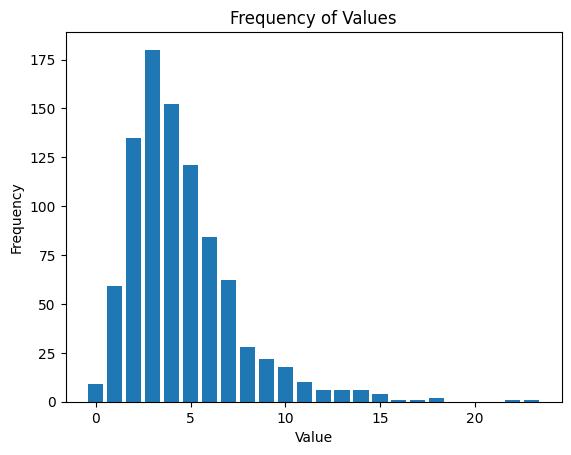

In [32]:
# Count the frequency of each value
value_counts_2 = {}
for value in delta_position_2:
    if value in value_counts_2:
        value_counts_2[value] += 1
    else:
        value_counts_2[value] = 1

# Extract values and frequencies for plotting
x_2 = list(value_counts_2.keys())
y_2 = list(value_counts_2.values())

# Plot the frequency of values
plt.bar(x_2, y_2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Values')
plt.show()

In [33]:
max(value_counts_2.values())

180

In [34]:
value_counts_2

{7: 62,
 6: 84,
 5: 121,
 4: 152,
 3: 180,
 2: 135,
 11: 10,
 10: 18,
 1: 59,
 13: 6,
 9: 22,
 18: 2,
 8: 28,
 0: 9,
 12: 6,
 14: 6,
 15: 4,
 22: 1,
 17: 1,
 23: 1,
 16: 1}

most frequent delta position value is 3.

In [35]:
value_counts_2[4]/sum(value_counts_2.values())

0.16740088105726872

Now I will calculate the delta position for between each three frames.

In [36]:
positions_id_3=dict()

for x in range(1,3):
    positions_id_3[x]=[]
    
positions_id1_3 =[]
positions_id2_3 =[]

for x in range(len(positions_id[1])//3):
    positions_id1_3 +=[positions_id[1][x*3]]
    positions_id2_3 +=[positions_id[2][x*3]]
    
positions_id_3[1]=positions_id1_3
positions_id_3[2]=positions_id2_3



In [37]:
delta_position_3=[]

for idd in range(1,3):

    positions=positions_id_3[idd]
    for i in range(len(positions)-1):

        point1=np.array(positions[i])
        point2=np.array(positions[i+1])

        dist = np.linalg.norm(point1 - point2)
            
        delta_position_3 +=[int(dist)]
            
            

In [38]:
delta_position_3[:10]

[10, 8, 7, 8, 7, 6, 6, 6, 5, 5]

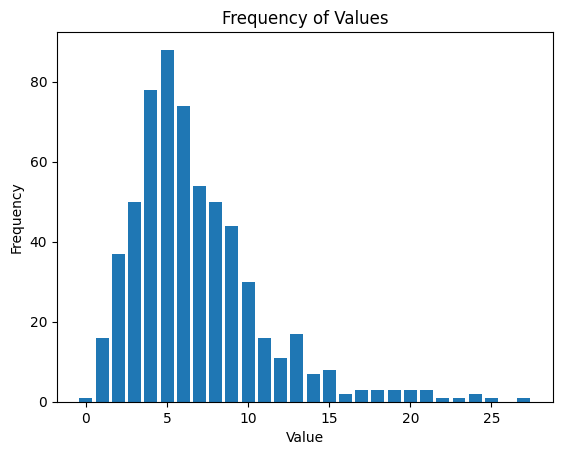

In [39]:
# Count the frequency of each value
value_counts_3 = {}
for value in delta_position_3:
    if value in value_counts_3:
        value_counts_3[value] += 1
    else:
        value_counts_3[value] = 1

# Extract values and frequencies for plotting
x_3 = list(value_counts_3.keys())
y_3 = list(value_counts_3.values())

# Plot the frequency of values
plt.bar(x_3, y_3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Values')
plt.show()

In [40]:
max(value_counts_3.values())

88

In [41]:
value_counts_3

{10: 30,
 8: 50,
 7: 54,
 6: 74,
 5: 88,
 4: 78,
 17: 3,
 9: 44,
 2: 37,
 12: 11,
 23: 1,
 18: 3,
 13: 17,
 11: 16,
 15: 8,
 3: 50,
 1: 16,
 19: 3,
 14: 7,
 21: 3,
 24: 2,
 20: 3,
 16: 2,
 22: 1,
 27: 1,
 25: 1,
 0: 1}

most frequent delta position value is 5.

In [42]:
value_counts_3[4]/sum(value_counts_3.values())

0.1291390728476821

In [43]:
df_1=pd.DataFrame(columns=['id1','id2'])

In [44]:
df_1['id1']=positions_id[1]
df_1['id2']=positions_id[2]


In [45]:
df_1.head()

,id1,id2
0,"(465, 346)","(522, 483)"
1,"(461, 347)","(522, 484)"
2,"(458, 347)","(522, 485)"
3,"(455, 348)","(521, 486)"
4,"(452, 349)","(520, 487)"


In [46]:
df_1.to_csv("z3_fish_positions_frame1.csv")

In [47]:
df_2=pd.DataFrame(columns=['id1','id2'])

In [48]:
df_2['id1']=positions_id1_2
df_2['id2']=positions_id2_2



In [49]:
df_2.to_csv("z3_fish_positions_frame2.csv")

In [52]:
list(range(5))

[0, 1, 2, 3, 4]

In [53]:
pwd

'/Users/canerozer/Desktop/BU/SPRING2024/CS585/final_project/dataset/z3'

In [54]:
ls

z3_box_coords.txt             z3_fish_positions_frame1.csv
z3_boxes.mp4                  z3_fish_positions_frame2.csv
z3_cropped.mp4                z3_modified_coords.txt


In [59]:
cd z3_uniform/

/Users/canerozer/Desktop/BU/SPRING2024/CS585/final_project/results/z3_uniform


In [60]:
ls

results_z3_id1_x4.txt             z3_predictions_model0_id1_x4.csv
results_z3_id2_x4.txt             z3_predictions_model0_id2_x4.csv
